In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('VizieR.tsv',sep=";")

### Explicação das Colunas no DataFrame dados:

*   **B-V**: Geralmente representa o Índice de Cor de uma estrela. É a diferença entre a magnitude aparente de uma estrela medida através de um filtro azul (B) e um filtro visual (V). É um indicador comum da temperatura superficial de uma estrela; valores de B-V menores (ou mais negativos) indicam estrelas mais quentes e azuis, enquanto valores maiores (mais positivos) indicam estrelas mais frias e vermelhas.

*   **Vmag**: Significa Magnitude Visual Aparente. É uma medida de quão brilhante uma estrela aparece a partir da Terra no espectro visual. Um valor de magnitude menor indica uma estrela mais brilhante, enquanto um valor maior indica uma estrela mais fraca.

*   **log.Teff**: Esta coluna representa o logaritmo da Temperatura Efetiva ($T_{eff}$) da estrela. A temperatura efetiva é a temperatura de um corpo negro que emitiria a mesma energia radiante total por unidade de área de superfície. É um parâmetro fundamental para caracterizar estrelas.
*   **logL**: Denota o logaritmo da Luminosidade ($L$) da estrela. A luminosidade é a quantidade total de energia irradiada por uma estrela por unidade de tempo. É uma propriedade intrínseca da estrela, independente de sua distância da Terra.

*   **Age**: Esta coluna indica a Idade da estrela, provavelmente em anos ou alguma outra unidade de tempo (frequentemente expressa em notação científica, por exemplo, 2.48e+07 seriam 24,8 milhões de anos).

*   **Mass**: Representa a Massa da estrela, tipicamente fornecida em massas solares (onde 1 massa solar é a massa do nosso Sol).

In [3]:
dados.head()

,B-V,Vmag,log.Teff,logL,Age,Mass
0,0.45,7.32,3.808,3.42,2.48e+07,7.67
1,0.45,7.32,3.808,3.42,3.82e+07,6.75
2,0.45,7.32,3.808,3.42,4.59e+07,6.47
3,0.71,7.38,3.767,3.39,2.47e+07,7.69
4,0.71,7.38,3.767,3.39,3.76e+07,6.77


In [4]:
# percebemos duas coisas:
# Mass com valores faltantes
# Age com o type de object indicando dados com problemas nessa coluna
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   B-V       9879 non-null   float64
 1   Vmag      9879 non-null   float64
 2   log.Teff  9879 non-null   float64
 3   logL      9879 non-null   float64
 4   Age       9879 non-null   object 
 5   Mass      9670 non-null   float64
dtypes: float64(5), object(1)
memory usage: 463.2+ KB


In [5]:
# forçando todos os dados de Age serem numéricos
dados['Age'] = pd.to_numeric(dados['Age'],errors='coerce')

In [6]:
# dados de age corrigidos (type)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   B-V       9879 non-null   float64
 1   Vmag      9879 non-null   float64
 2   log.Teff  9879 non-null   float64
 3   logL      9879 non-null   float64
 4   Age       9670 non-null   float64
 5   Mass      9670 non-null   float64
dtypes: float64(6)
memory usage: 463.2 KB


In [7]:
# Convertendo a idade para bilhoes de anos
dados['Age'] = dados['Age'] / 1e9

In [8]:
dados.head()

,B-V,Vmag,log.Teff,logL,Age,Mass
0,0.45,7.32,3.808,3.42,0.0248,7.67
1,0.45,7.32,3.808,3.42,0.0382,6.75
2,0.45,7.32,3.808,3.42,0.0459,6.47
3,0.71,7.38,3.767,3.39,0.0247,7.69
4,0.71,7.38,3.767,3.39,0.0376,6.77


In [9]:
# Idade minima valor negativo(caso impossível)
# e máxima maior que 15 bilhoes de anos(idade do universo)
print(dados['Age'].min())
print(dados['Age'].max())

-296.0
1540000.0


In [10]:
# Filtrando os dados para pegar apenas valores maiores que 0 e menores que 15
dados = dados[(dados['Age']>0) & (dados['Age']<15)]

In [11]:
print(dados['Age'].min())
print(dados['Age'].max())

4.18e-07
14.7


In [12]:
# Verificando os NAN
dados.isna().sum()

,0
B-V,0
Vmag,0
log.Teff,0
logL,0
Age,0
Mass,0


<Axes: xlabel='B-V', ylabel='logL'>

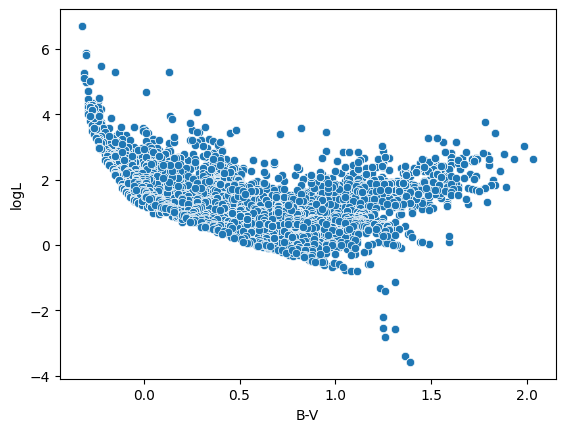

In [13]:
# percebemos uma tendencia entre cor(temperatura) e Luminosidade das estrelas, quanto mais quente(mais para o azul) maior a tendência de ter um maior brilho
sns.scatterplot(x='B-V',y='logL',data=dados)

<Axes: >

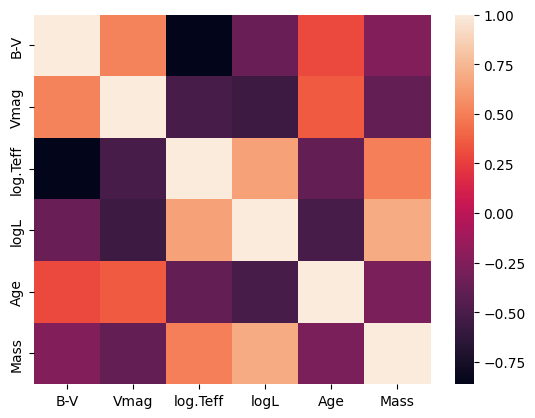

In [14]:
# B-V tem uma correlação inversa com a temperatura efetiva
corr = dados.corr()
sns.heatmap(corr)

/tmp/ipython-input-39968/1598353412.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=dados['B-V'],ax=ax[0][0])
/tmp/ipython-input-39968/1598353412.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=dados['Vmag'],ax=ax[0][1])
/tmp/ipython-input-39968/1598353412.py:6: UserWarning: 

`distp

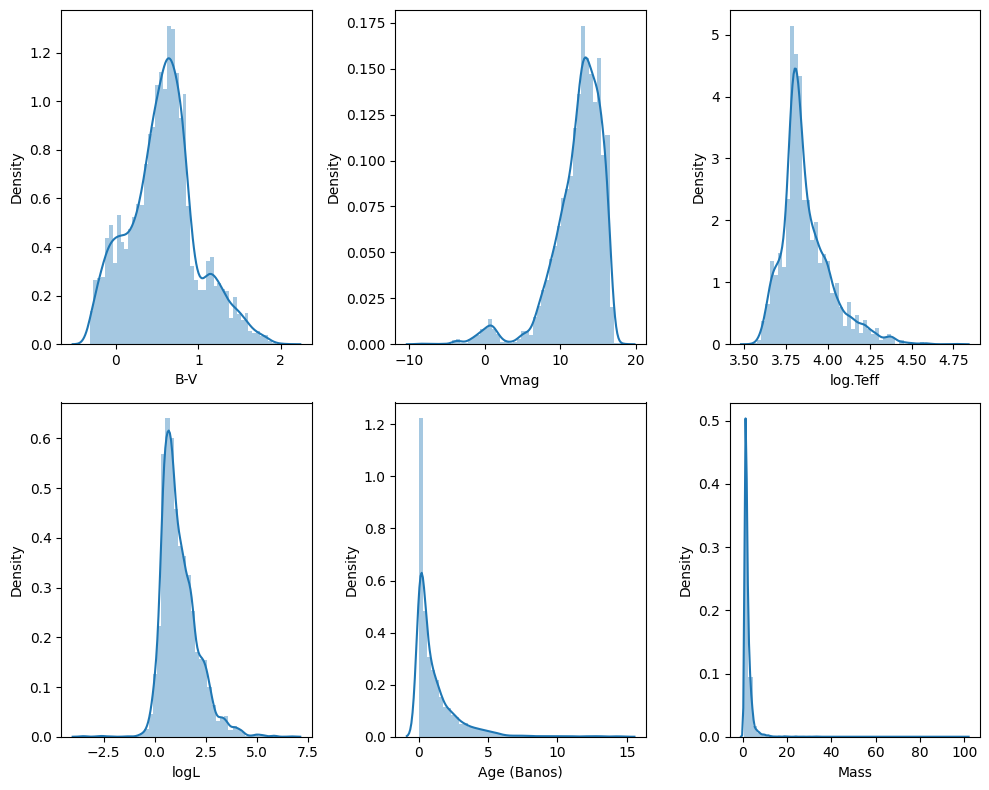

In [15]:
fig, ax = plt.subplots(2,3,figsize=(10,8))
sns.distplot(x=dados['B-V'],ax=ax[0][0])
ax[0][0].set_xlabel('B-V')
sns.distplot(x=dados['Vmag'],ax=ax[0][1])
ax[0][1].set_xlabel('Vmag')
sns.distplot(x=dados['log.Teff'],ax=ax[0][2])
ax[0][2].set_xlabel('log.Teff')

sns.distplot(x=dados['logL'],ax=ax[1][0])
ax[1][0].set_xlabel('logL')
sns.distplot(x=dados['Age'],ax=ax[1][1])
ax[1][1].set_xlabel('Age (Banos)')
sns.distplot(x=dados['Mass'],ax=ax[1][2])
ax[1][2].set_xlabel('Mass')
plt.tight_layout()
plt.show()

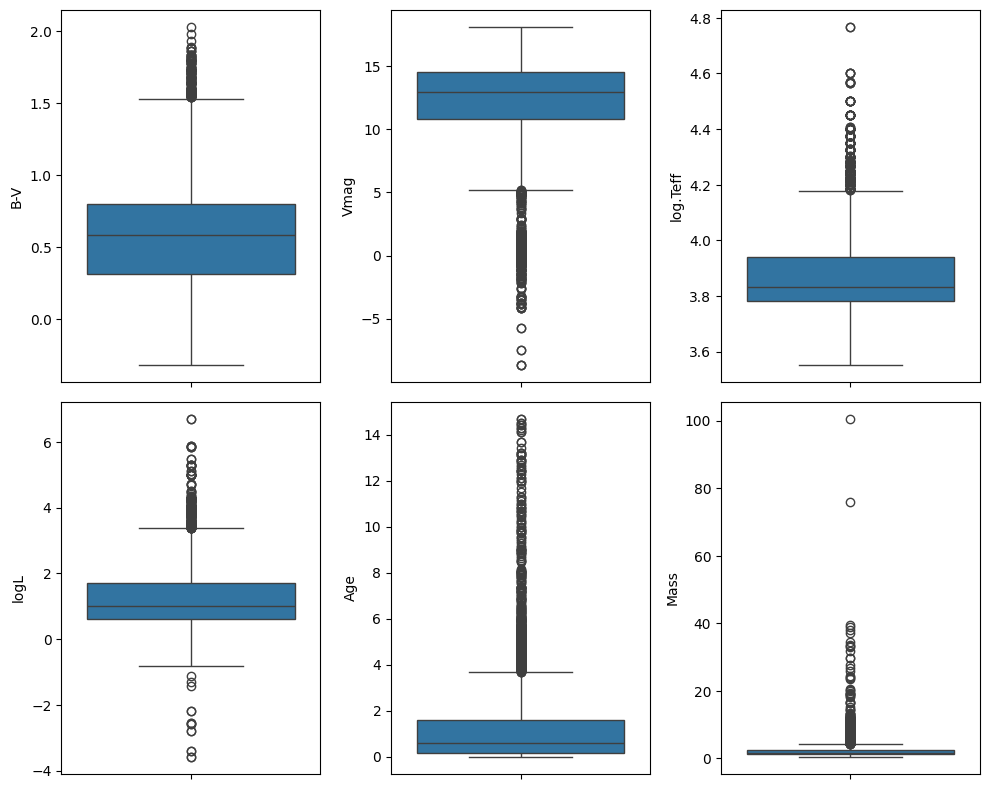

In [16]:
fig, ax = plt.subplots(2,3,figsize=(10,8))
sns.boxplot(y='B-V',data=dados,ax=ax[0][0])
sns.boxplot(y='Vmag',data=dados,ax=ax[0][1])
sns.boxplot(y='log.Teff',data=dados,ax=ax[0][2])
sns.boxplot(y='logL',data=dados,ax=ax[1][0])
sns.boxplot(y='Age',data=dados,ax=ax[1][1])
sns.boxplot(y='Mass',data=dados,ax=ax[1][2])
plt.tight_layout()

In [17]:
X = dados.drop('Age',axis=1).values
Y = dados['Age'].values

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_treino,X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.3,random_state=42)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
modelo = []
MAE = []
RMSE = []

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
linreg = LinearRegression()

In [24]:
linreg.fit(X_treino,Y_treino)

LinearRegression()

In [25]:
Y_pred_linreg = linreg.predict(X_teste)

In [26]:
MAE_linreg = mean_absolute_error(Y_teste,Y_pred_linreg)
MSE_linreg = mean_squared_error(Y_teste,Y_pred_linreg)
RMSE_linreg = np.sqrt(MSE_linreg)

In [27]:
modelo.append("Regressão Linear")
MAE.append(MAE_linreg)
RMSE.append(RMSE_linreg)

In [28]:
# na regreção linear o RMSE = 1.40 errando em 1.40 bilhoes de anos
print("MAE = {:0.2f}".format(MAE_linreg))
print("MSE = {:0.2f}".format(MSE_linreg))
print("RMSE = {:0.2f}".format(RMSE_linreg))

MAE = 0.86
MSE = 1.96
RMSE = 1.40


In [29]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
dtr = DecisionTreeRegressor()

In [63]:
dtr.fit(X_treino,Y_treino)

DecisionTreeRegressor()

In [64]:
Y_pred_dtr = dtr.predict(X_teste)

In [65]:
MAE_dtr = mean_absolute_error(Y_teste,Y_pred_dtr)
MSE_dtr = mean_squared_error(Y_teste,Y_pred_dtr)
RMSE_dtr = np.sqrt(MSE_dtr)

In [66]:
modelo.append("Arvore Decisão")
MAE.append(MAE_dtr)
RMSE.append(RMSE_dtr)

In [67]:
# a Arvore Decisão foi bem melhor que a regreção linear tenho o RMSE = 0.72 mas pode ter sido um Overfitting
# que iremos verificar abaixo
print("MAE = {:0.2f}".format(MAE_dtr))
print("MSE = {:0.2f}".format(MSE_dtr))
print("RMSE = {:0.2f}".format(RMSE_dtr))

MAE = 0.15
MSE = 0.52
RMSE = 0.72


In [68]:
# Descobrindo a profundidade máxima (quantos "andares" a árvore tem)
profundidade_atual = dtr.get_depth()

# Descobrindo o número de folhas (quantos grupos isolados ela formou no final)
numero_de_folhas = dtr.get_n_leaves()

print("--- TAMANHO DA ÁRVORE ORIGINAL ---")
print("Profundidade (max_depth):", profundidade_atual)
print("Número de folhas:", numero_de_folhas)

--- TAMANHO DA ÁRVORE ORIGINAL ---
Profundidade (max_depth): 23
Número de folhas: 5160


In [69]:
# Overfitting confirmado pois o TREINO - RMSE = 0.10 muito proximo de 0

Y_pred_dtr_treino = dtr.predict(X_treino)

# 2. Calculando os erros para os dados de TREINO
MAE_dtr_treino = mean_absolute_error(Y_treino, Y_pred_dtr_treino)
MSE_dtr_treino = mean_squared_error(Y_treino, Y_pred_dtr_treino)
RMSE_dtr_treino = np.sqrt(MSE_dtr_treino)

# 3. Imprimindo os resultados para comparação
print("--- DESEMPENHO DA ÁRVORE DE DECISÃO ---")
print("TREINO - RMSE: {:0.2f}".format(RMSE_dtr_treino))
print("TESTE  - RMSE: {:0.2f}".format(RMSE_dtr))

--- DESEMPENHO DA ÁRVORE DE DECISÃO ---
TREINO - RMSE: 0.10
TESTE  - RMSE: 0.72


In [78]:
# corrigindo o Overfitting
dtr_podado = DecisionTreeRegressor(max_depth=5)
dtr_podado.fit(X_treino,Y_treino)
Y_pred_dtr_podado = dtr_podado.predict(X_teste)

MAE_dtr_podado = mean_absolute_error(Y_teste,Y_pred_dtr_podado)
MSE_dtr_podado = mean_squared_error(Y_teste,Y_pred_dtr_podado)
RMSE_dtr_podado = np.sqrt(MSE_dtr)

print("MAE = {:0.2f}".format(MAE_dtr_podado))
print("MSE = {:0.2f}".format(MSE_dtr_podado))
print("RMSE = {:0.2f}".format(RMSE_dtr_podado))

Y_pred_dtr_treino = dtr_podado.predict(X_treino)

# 2. Calculando os erros para os dados de TREINO
MAE_dtr_treino = mean_absolute_error(Y_treino, Y_pred_dtr_treino)
MSE_dtr_treino = mean_squared_error(Y_treino, Y_pred_dtr_treino)
RMSE_dtr_treino = np.sqrt(MSE_dtr_treino)

# 3. Imprimindo os resultados para comparação
print("--- DESEMPENHO DA ÁRVORE DE DECISÃO ---")
print("TREINO - RMSE: {:0.2f}".format(RMSE_dtr_treino))
print("TESTE  - RMSE: {:0.2f}".format(RMSE_dtr))

MAE = 0.35
MSE = 0.63
RMSE = 0.72
--- DESEMPENHO DA ÁRVORE DE DECISÃO ---
TREINO - RMSE: 0.64
TESTE  - RMSE: 0.72


In [79]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
rf = RandomForestRegressor(n_estimators=100,max_depth=7, random_state=42)

In [105]:
rf.fit(X_treino, Y_treino)

RandomForestRegressor(max_depth=7, random_state=42)

In [106]:
# Previsões para o Treino (para checar o overfitting)
Y_pred_rf_treino = rf.predict(X_treino)

# Previsões para o Teste
Y_pred_rf_teste = rf.predict(X_teste)

In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculando o RMSE do Treino e do Teste
RMSE_rf_treino = np.sqrt(mean_squared_error(Y_treino, Y_pred_rf_treino))
RMSE_rf_teste = np.sqrt(mean_squared_error(Y_teste, Y_pred_rf_teste))

print("--- DESEMPENHO DO RANDOM FOREST ---")
print("TREINO - RMSE: {:0.2f}".format(RMSE_rf_treino))
print("TESTE  - RMSE: {:0.2f}".format(RMSE_rf_teste))

--- DESEMPENHO DO RANDOM FOREST ---
TREINO - RMSE: 0.32
TESTE  - RMSE: 0.57


--- IMPORTÂNCIA DAS VARIÁVEIS ---
   Variável  Importância
4      Mass     0.674018
3      logL     0.165394
2  log.Teff     0.139331
0       B-V     0.013052
1      Vmag     0.008206


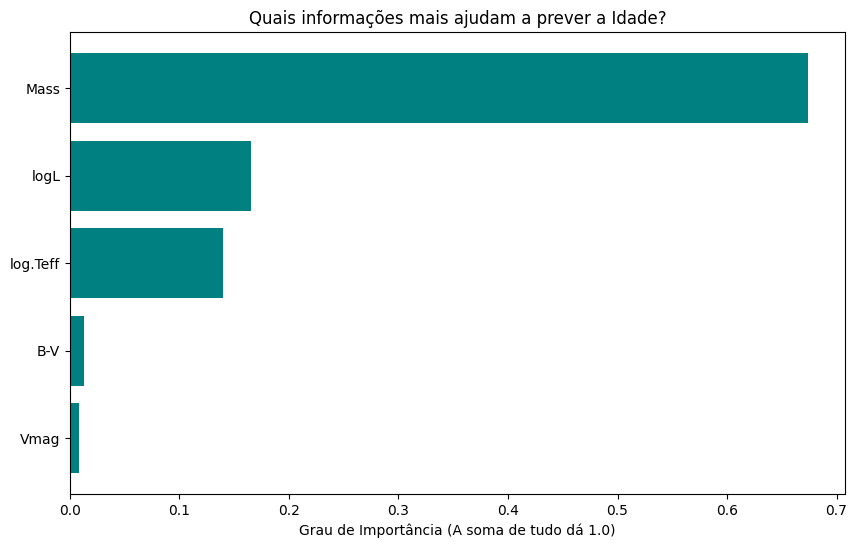

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Resgatando o nome das colunas originais (as "perguntas" do modelo)
# Usamos a mesma lógica do início, removendo a coluna 'Age'
nomes_das_colunas = dados.drop('Age', axis=1).columns

# 2. Extraindo o nível de importância de dentro do modelo treinado (rf)
importancias = rf.feature_importances_

# 3. Criando uma tabela para organizar do maior para o menor
tabela_importancias = pd.DataFrame({
    'Variável': nomes_das_colunas,
    'Importância': importancias
})
# Ordenando para a variável mais importante aparecer no topo
tabela_importancias = tabela_importancias.sort_values(by='Importância', ascending=False)

# 4. Imprimindo a tabela no console
print("--- IMPORTÂNCIA DAS VARIÁVEIS ---")
print(tabela_importancias)

# 5. Criando um gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(tabela_importancias['Variável'], tabela_importancias['Importância'], color='teal')
plt.gca().invert_yaxis()
plt.title('Quais informações mais ajudam a prever a Idade?')
plt.xlabel('Grau de Importância (A soma de tudo dá 1.0)')
plt.show()